In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import LabelEncoder

import pandas as pd
import numpy as np
import tensorflow as tf

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
filename = '/content/drive/My Drive/Colab Notebooks/dataset/sonar.csv'

In [3]:
df = pd.read_csv(filename)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 61 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0.0200  207 non-null    float64
 1   0.0371  207 non-null    float64
 2   0.0428  207 non-null    float64
 3   0.0207  207 non-null    float64
 4   0.0954  207 non-null    float64
 5   0.0986  207 non-null    float64
 6   0.1539  207 non-null    float64
 7   0.1601  207 non-null    float64
 8   0.3109  207 non-null    float64
 9   0.2111  207 non-null    float64
 10  0.1609  207 non-null    float64
 11  0.1582  207 non-null    float64
 12  0.2238  207 non-null    float64
 13  0.0645  207 non-null    float64
 14  0.0660  207 non-null    float64
 15  0.2273  207 non-null    float64
 16  0.3100  207 non-null    float64
 17  0.2999  207 non-null    float64
 18  0.5078  207 non-null    float64
 19  0.4797  207 non-null    float64
 20  0.5783  207 non-null    float64
 21  0.5071  207 non-null    float64
 22  0.

In [ ]:
print(df.head())

   0.0200  0.0371  0.0428  0.0207  0.0954  ...  0.0180  0.0084  0.0090  0.0032  R
0  0.0453  0.0523  0.0843  0.0689  0.1183  ...  0.0140  0.0049  0.0052  0.0044  R
1  0.0262  0.0582  0.1099  0.1083  0.0974  ...  0.0316  0.0164  0.0095  0.0078  R
2  0.0100  0.0171  0.0623  0.0205  0.0205  ...  0.0050  0.0044  0.0040  0.0117  R
3  0.0762  0.0666  0.0481  0.0394  0.0590  ...  0.0072  0.0048  0.0107  0.0094  R
4  0.0286  0.0453  0.0277  0.0174  0.0384  ...  0.0057  0.0027  0.0051  0.0062  R

[5 rows x 61 columns]


In [4]:
dataset = df.values
X = dataset[:, 0:60].astype(float)
Y_obj = dataset[:, 60]

In [5]:
e = LabelEncoder()
e.fit(Y_obj)
Y = e.transform(Y_obj)
print(Y_obj)
print(Y)

['R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R'
 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R'
 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R'
 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R'
 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R'
 'R' 'R' 'R' 'R' 'R' 'R' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M'
 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M'
 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M'
 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M'
 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M'
 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M'
 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M']
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3) # 데이터 분리 = 학습 + 테스트

In [ ]:
print(X.shape)
print(X_train.shape) # 훈련 70%, 테스트 30% 
print(X_test.shape)

(207, 60)
(144, 60)
(63, 60)


In [7]:
model = Sequential()
model.add(Dense(24, input_dim = 60, activation='relu'))
model.add(Dense(10,  activation='relu'))
model.add(Dense(1,  activation='sigmoid'))


In [8]:
model.compile(loss="mean_squared_error",
              optimizer='adam',
              metrics=["accuracy"]
              )

In [10]:
history = model.fit(X_train, Y_train, validation_split=0.2, epochs=200, batch_size=5)

Epoch 1/200
23/23 [==============================] - 1s 9ms/step - loss: 0.2450 - accuracy: 0.5565 - val_loss: 0.2394 - val_accuracy: 0.5862
Epoch 2/200
23/23 [==============================] - 0s 3ms/step - loss: 0.2385 - accuracy: 0.6087 - val_loss: 0.2336 - val_accuracy: 0.5862
Epoch 3/200
23/23 [==============================] - 0s 2ms/step - loss: 0.2319 - accuracy: 0.6522 - val_loss: 0.2306 - val_accuracy: 0.6552
Epoch 4/200
23/23 [==============================] - 0s 2ms/step - loss: 0.2245 - accuracy: 0.6783 - val_loss: 0.2188 - val_accuracy: 0.6897
Epoch 5/200
23/23 [==============================] - 0s 3ms/step - loss: 0.2221 - accuracy: 0.6783 - val_loss: 0.2117 - val_accuracy: 0.7586
Epoch 6/200
23/23 [==============================] - 0s 3ms/step - loss: 0.2072 - accuracy: 0.7391 - val_loss: 0.2032 - val_accuracy: 0.7241
Epoch 7/200
23/23 [==============================] - 0s 3ms/step - loss: 0.1991 - accuracy: 0.6957 - val_loss: 0.1958 - val_accuracy: 0.7241
Epoch 8/200
2

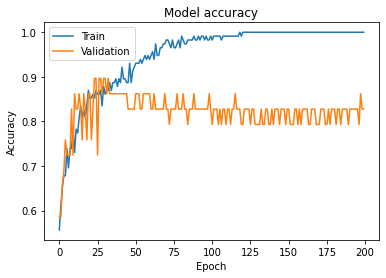

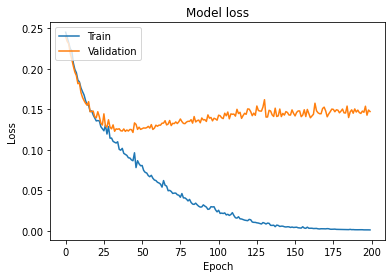

In [11]:
import matplotlib.pyplot as plt
# 훈련 과정 시각화 (정확도)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# 훈련 과정 시각화 (손실)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [12]:
test_loss, test_acc= model.evaluate(X_test, Y_test)

2/2 [==============================] - 0s 6ms/step - loss: 0.1521 - accuracy: 0.8095


In [ ]:
print(test_acc)

0.8095238208770752
